In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Read The Train Data

In [3]:
train = pd.read_csv("./train.csv") #Reading the dataset in a dataframe using Pandas
test = pd.read_csv("./test.csv") #Reading the dataset in a dataframe using Pandas
df = train.append(test)
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)

### Quick Data Exploration

In [4]:
df.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No


### summary of numerical fields by using describe() function

In [5]:
df.describe() # get the summary of numerical variables

/Users/amitweiss/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,NaN,NaN,NaN
50%,3800.000000,1110.000000,NaN,NaN,NaN
75%,5516.000000,2365.000000,NaN,NaN,NaN
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


## Task 1:
### find the number of missing values for each field

In [6]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

### percentage of applicants with credit history: 475/(475+89) = 0.84 => 84%

In [7]:
df['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

## Distribution Of ApplicantIncome and CoapplicantIncome.

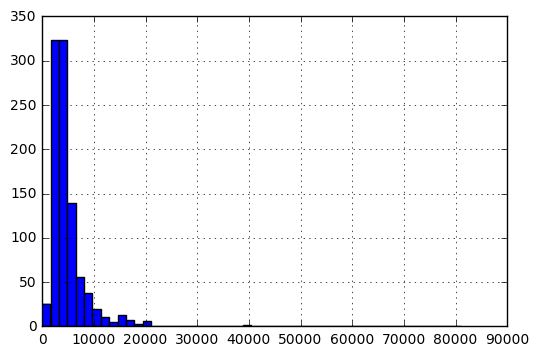

In [8]:
df['ApplicantIncome'].hist(bins=50)

/Users/amitweiss/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x112e1d690>],
 'caps': [<matplotlib.lines.Line2D at 0x112e29590>,
 'fliers': [<matplotlib.lines.Line2D at 0x112e35810>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x112e35250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x112e1d850>,
  <matplotlib.lines.Line2D at 0x112e1df10>]}

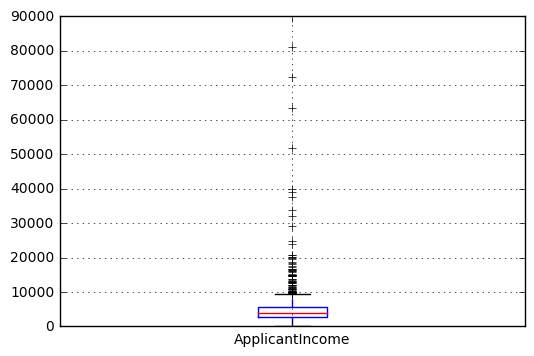

In [9]:
df.boxplot(column='ApplicantIncome')

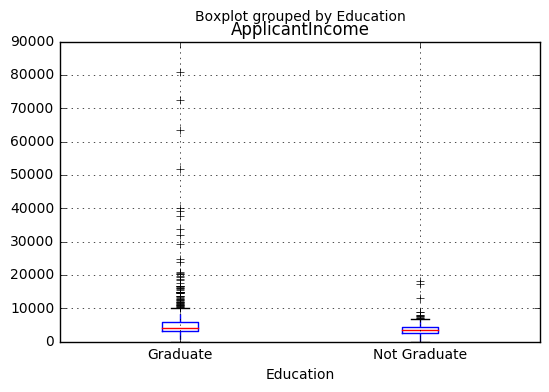

In [10]:
df.boxplot(column='ApplicantIncome', by = 'Education')

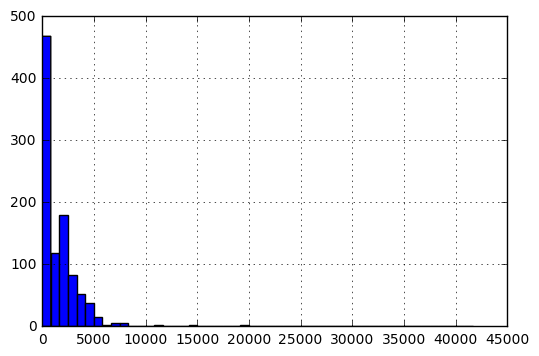

In [11]:
df['CoapplicantIncome'].hist(bins=50)

/Users/amitweiss/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x113632a50>],
 'caps': [<matplotlib.lines.Line2D at 0x11363eb90>,
 'fliers': [<matplotlib.lines.Line2D at 0x11364ae90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11364a850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x113632e50>,
  <matplotlib.lines.Line2D at 0x11363e550>]}

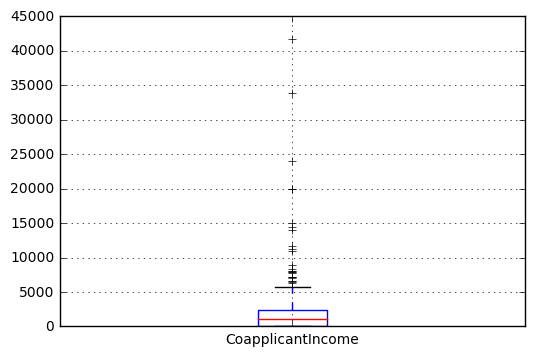

In [12]:
df.boxplot(column='CoapplicantIncome')

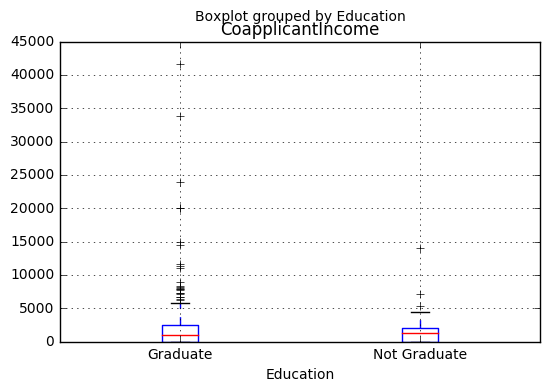

In [13]:
df.boxplot(column='CoapplicantIncome', by = 'Education')

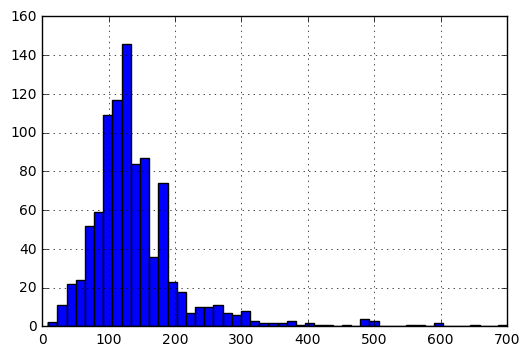

In [14]:
df['LoanAmount'].hist(bins=50)

/Users/amitweiss/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x113e44b90>],
 'caps': [<matplotlib.lines.Line2D at 0x113e53a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x113e5ed90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113e5e750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x113e44d50>,
  <matplotlib.lines.Line2D at 0x113e53450>]}

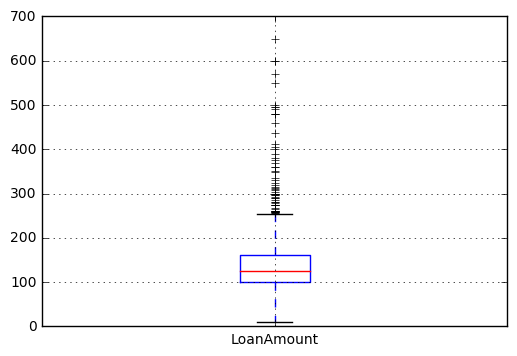

In [15]:
df.boxplot(column='LoanAmount')

## Data Visualizaion And Dependecies of Gender - Loan_Status and Education - Loan_Status

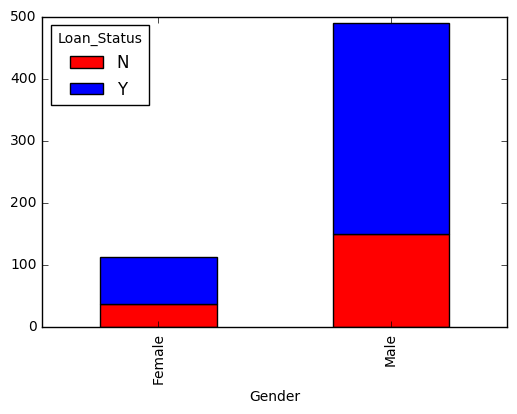

In [16]:
temp3 = pd.crosstab(df['Gender'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

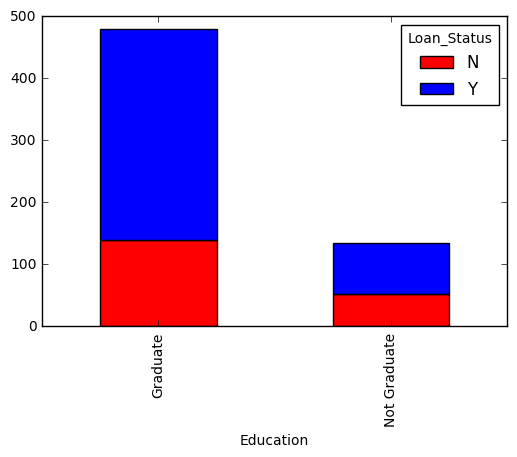

In [17]:
temp3 = pd.crosstab(df['Education'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

## Data munging
### Fill The Data Of All NA values 

In [18]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )

In [52]:
df['Married'].value_counts()
df['Married'].fillna('Yes', inplace=True)

### We Can See That Most Of the Amount Terms Are For 360 days 
### So We Put This Value instead of The NA value

In [53]:
df['Loan_Amount_Term'].value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [21]:
df['Loan_Amount_Term'].fillna(360, inplace=True)

### Dependents - same as loan_amonut_term we decided to put the majority

In [22]:
df['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [23]:
df['Dependents'].fillna(0, inplace=True)

In [24]:
df['Credit_History'].fillna(1, inplace=True)

In [25]:
df['Self_Employed'].fillna('No',inplace=True)

## Handle Extreme Values With Log Function

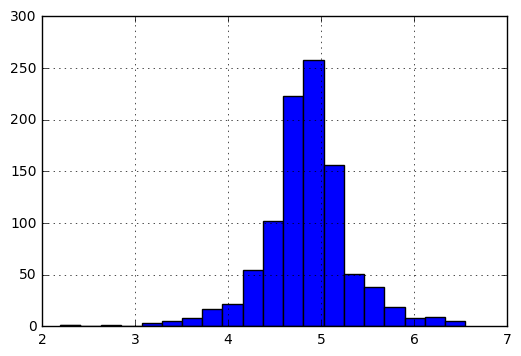

In [26]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

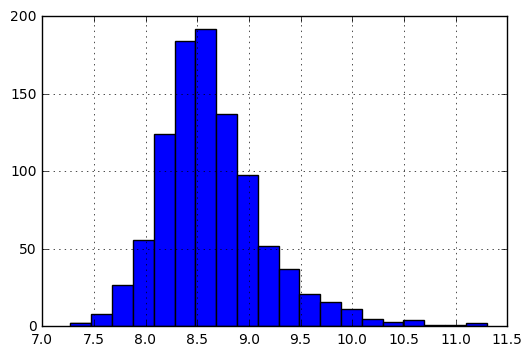

In [27]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

## Building a Predictive Model in Python
### Check the Types 
### Convert Object Type to Numerical

In [28]:
df.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

In [30]:
df.dtypes 


ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents             int64
Education              int64
Gender                 int64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married                int64
Property_Area          int64
Self_Employed          int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

## Then we will define a generic classification function, which takes a model as input and determines the Accuracy and Cross-Validation scores.

In [47]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 



In [48]:
train = df.head(614)
test = df.iloc[614:]

## First Model - BaggingClassifier()

In [50]:
outcome_var = 'Loan_Status'
model = BaggingClassifier()
predictor_var = ['ApplicantIncome','CoapplicantIncome','Credit_History','Dependents','Education','Gender','LoanAmount','Loan_Amount_Term'
 ,'Married','Property_Area','Self_Employed','TotalIncome']
model = GridSearchCV(model,{'n_estimators': [10,50,100],'max_samples' : [2,3,20]} )
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 81.107%
Cross-Validation Score : 80.946%


In [51]:
model.fit(train[predictor_var],train[outcome_var])
predictions = model.predict(test[predictor_var])
loan_ids = test['Loan_ID']
result2 = pd.DataFrame({'Loan_ID': loan_ids.values, 'Loan_Status': predictions})
result2.to_csv('result1.csv', index=False)

## Second Model - AdaBoostClassifier()

In [41]:
outcome_var = 'Loan_Status'
model = AdaBoostClassifier()
predictor_var = ['ApplicantIncome','CoapplicantIncome','Credit_History','Dependents','Education','Gender','LoanAmount','Loan_Amount_Term'
 ,'Married','Property_Area','Self_Employed','TotalIncome']
model = GridSearchCV(model,{'n_estimators': [10,50,200]} )
classification_model(model, train,predictor_var,outcome_var)


Accuracy : 82.248%
Cross-Validation Score : 80.135%


In [42]:
model.fit(train[predictor_var],train[outcome_var])
predictions = model.predict(test[predictor_var])
loan_ids = test['Loan_ID']
result2 = pd.DataFrame({'Loan_ID': loan_ids.values, 'Loan_Status': predictions})
result2.to_csv('result2.csv', index=False)